In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [5]:
#Loading dataset
booking = pd.read_csv('census.csv')
df = booking[["age", "education.num","marital.status","occupation", "capital.gain","capital.loss","hours.per.week","native.country"]]

In [6]:
df['marital.status'] = LabelEncoder().fit_transform(df['marital.status'])
df['occupation'] = LabelEncoder().fit_transform(df['occupation'])
df['native.country'] = LabelEncoder().fit_transform(df['native.country'])
df

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country
0,90,9,6,0,0,4356,40,39
1,82,9,6,4,0,4356,18,39
2,66,10,6,0,0,4356,40,39
3,54,4,0,7,0,3900,40,39
4,41,10,5,10,0,3900,40,39
...,...,...,...,...,...,...,...,...
32556,22,10,4,11,0,0,40,39
32557,27,12,2,13,0,0,38,39
32558,40,9,2,7,0,0,40,39
32559,58,9,6,1,0,0,40,39


In [7]:
#Dataset info
df.shape

(32561, 8)

In [8]:
df.describe()


,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,2.611836,6.572740,1077.648844,87.303830,40.437456,36.718866
std,13.640433,2.572720,1.506222,4.228857,7385.292085,402.960219,12.347429,7.823782
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,2.000000,3.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,10.000000,2.000000,7.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,12.000000,4.000000,10.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,16.000000,6.000000,14.000000,99999.000000,4356.000000,99.000000,41.000000


In [9]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [10]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [11]:
outliers_IF

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF
0,90,9,6,0,0,4356,40,39,-1
1,82,9,6,4,0,4356,18,39,-1
2,66,10,6,0,0,4356,40,39,-1
3,54,4,0,7,0,3900,40,39,-1
4,41,10,5,10,0,3900,40,39,-1
...,...,...,...,...,...,...,...,...,...
32498,42,9,0,12,0,0,50,0,-1
32500,82,9,4,0,0,0,3,39,-1
32513,45,6,0,8,0,0,38,6,-1
32528,81,11,0,0,0,0,1,0,-1


In [12]:
inliers_IF

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF
189,55,9,2,10,0,2246,40,39,1
225,40,10,2,7,0,2179,40,39,1
228,41,9,2,6,0,2179,40,39,1
229,34,10,2,14,0,2179,40,39,1
242,37,9,2,3,0,2129,40,39,1
...,...,...,...,...,...,...,...,...,...
32556,22,10,4,11,0,0,40,39,1
32557,27,12,2,13,0,0,38,39,1
32558,40,9,2,7,0,0,40,39,1
32559,58,9,6,1,0,0,40,39,1


In [13]:
def is_inlier(row):
    # Age constraint: should be >17
    if  row['age'] < 17:
        return -1

    # Education number constraint: 1 < education.num < 16
    if row['education.num'] < 1 or row['education.num'] > 16:
        return -1

    # Capital gain constraint: capital.gain ≥ 0
    if row['capital.gain'] < 0:
        return -1

    # Capital loss constraint: capital.loss ≥ 0
    if row['capital.loss'] < 0:
        return -1

    # Hours per week constraint: 0 < hours.per.week < 168
    if row['hours.per.week'] < 0 or row['hours.per.week'] > 168:
        return -1

    # Occupation-specific constraint
    if row['occupation'] == "Armed-Forces" and row['workclass'] != "Federal-gov":
        return -1

    # Marital status and relationship constraint
    if row['marital.status'] == "Married-civ-spouse" and row['relationship'] == "Unmarried":
        return -1

    # If all constraints are satisfied, return True
    return 1

In [14]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [15]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF,is_inlier_HW


In [16]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [17]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [18]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [19]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[    0,     0],
       [ 3256, 29305]])

Text(95.72222222222221, 0.5, 'Handwritten')

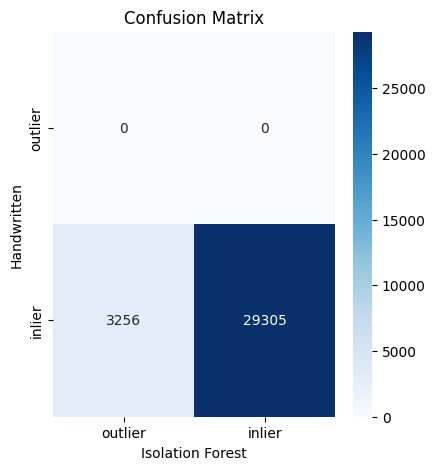

In [20]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [21]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [22]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")